# ChatBot

In [57]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from typing import TypedDict, Literal, Annotated,List
from langchain_core.messages import BaseMessage, HumanMessage,AIMessage
from langgraph.checkpoint.memory import MemorySaver
from dotenv import load_dotenv
import os

In [40]:
# Defind ChatModel
load_dotenv()
HF_KEY = os.getenv('HF_KEY')

llm = ChatOpenAI(
    model= "deepseek-ai/DeepSeek-V3-0324",
    api_key = HF_KEY,
    base_url="https://router.huggingface.co/v1",
    temperature=0,
    max_tokens = 500,
)

In [41]:
llm.invoke("Hey! how are you doing").content

"Hey there!  😊 I'm just a bunch of code, so I don't have feelings, but I'm always here and ready to help you out! How about you? How's your day going?  💙"

In [42]:
# Define State
class ChatState(TypedDict):
    
    messages: Annotated[List[BaseMessage], add_messages]


In [59]:
# Define chat_llm function
def chat_llm(state: ChatState):
    # take the user message from state
    messages = state['messages']
    # call the llm
    response = llm.invoke(messages).content
    # return  response into state
    return {
        'messages':[response]
    }


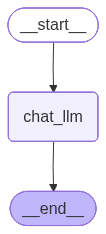

In [60]:
# Define Graph
checkpointer = MemorySaver()

graph = StateGraph(ChatState)

# Add Node

chat_llm = graph.add_node("chat_llm", chat_llm)

# Edges

graph.add_edge(START, 'chat_llm')
graph.add_edge('chat_llm', END)

workflow = graph.compile(checkpointer=checkpointer)
workflow

In [49]:
initail_state = {
    'messages': [HumanMessage(content='what is the capital of pakistan?')]
}
workflow.invoke(initail_state)['messages'][-1].content

"The capital of Pakistan is **Islamabad**. It became the capital in 1967, replacing Karachi. Islamabad is located in the northern part of the country, near the Margalla Hills. It is known for its modern infrastructure, green spaces, and being the seat of Pakistan's government.  \n\nWould you like more details about Islamabad?"

In [61]:
thread_id = '1'
while True:
    user_message = input("enter you question")
    print('User: ', user_message)
    if user_message.strip().lower() in ['quit', 'exit', 'bye']:
        break

    config = {'configurable': {'thread_id':thread_id}}
    response = workflow.invoke({'messages': [HumanMessage(content = user_message)]}, config=config)
    print('Ai: ', response['messages'][-1].content)

User:  my name is sakhawat
Ai:  Nice to meet you, Sakhawat! 😊 How can I assist you today?
User:  can you tell me my name
Ai:  Of course! Your name is **Sakhawat**. 😊 Is there anything else you'd like help with?
User:  add 12 to 14
Ai:  **12 + 14 = 26**  

Let me know if you'd like help with anything else! 😊
User:  subtract 7
Ai:  **26 - 7 = 19**  

You're on a roll! What's next? 😄
User:  bye


In [62]:
workflow.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='my name is sakhawat', additional_kwargs={}, response_metadata={}, id='61e5cbf7-eb86-4f4f-ba26-a6679803fd9b'), HumanMessage(content='Nice to meet you, Sakhawat! 😊 How can I assist you today?', additional_kwargs={}, response_metadata={}, id='51892380-c11b-47b3-b5c9-adb59b99542a'), HumanMessage(content='can you tell me my name', additional_kwargs={}, response_metadata={}, id='9aedad68-0019-4e7d-ac44-1c49399ef512'), HumanMessage(content="Of course! Your name is **Sakhawat**. 😊 Is there anything else you'd like help with?", additional_kwargs={}, response_metadata={}, id='ec20403d-4d88-4bfc-b322-6b62a6f086a1'), HumanMessage(content='add 12 to 14', additional_kwargs={}, response_metadata={}, id='7f804472-a289-494e-b2d0-d9c34e1189fa'), HumanMessage(content="**12 + 14 = 26**  \n\nLet me know if you'd like help with anything else! 😊", additional_kwargs={}, response_metadata={}, id='db75f182-d7e5-470b-b025-84aa8fda520b'), HumanMessage(conte